#Q1: Probabilistic N-Gram Language Model(50 points)

**Objective:**

The objective of this question is to implement and experiment with an N-Gram language model using the Reuters dataset. The task involves building a probabilistic N-Gram model and creating a text generator based on the trained model with customizable parameters.

**Tasks:**


**1.Text Preprocessing (5 points):**
*   Implement the preprocess_text function to perform necessary text preprocessing. You may use NLTK or other relevant libraries for this task. (Already provided, no modification needed)


**2.Build Probabilistic N-Gram Model (15 points):**

*   Implement the build_probabilistic_ngram_model function to construct a probabilistic N-Gram model from the Reuters dataset.


**3.Generate Text with Customizable Parameters (15 points):**

*   Implement the generate_text function to generate text given a seed text and the probabilistic N-Gram model.
*   The function should have parameters for probability_threshold and min_length to customize the generation process.
*   Ensure that the generation stops when either the specified min_length is reached or the probabilities fall below probability_threshold.


**4.Experimentation and Parameter Tuning (5 points):**

*   Use Google Colab to experiment with different values of n_value, probability_threshold, and min_length.
Find the optimal parameters that result in coherent and meaningful generated text.
*   Provide a detailed analysis of the impact of changing each parameter on the generated text's quality.
*   Discuss any challenges faced during parameter tuning and propose potential improvements.


**5.Results and Conclusion (10 points):**

*   Summarize your findings and present the optimal parameter values for n_value, probability_threshold, and min_length.
*   Discuss the trade-offs and considerations when selecting these parameters.
*   Conclude with insights gained from the experimentation.

In [ ]:
import nltk  # Import the Natural Language Toolkit library
import re  # Import the regular expression library
from nltk.corpus import reuters, stopwords  # Import the Reuters corpus and stopwords from NLTK
from nltk import ngrams  # Import ngrams from NLTK
import random  # Import the random module
import string  # Import the string module
from collections import defaultdict  # Import defaultdict from the collections module
from nltk.tokenize import word_tokenize  # Import word_tokenize from NLTK to tokenize words
from nltk.stem import WordNetLemmatizer  # Import WordNetLemmatizer from NLTK for word lemmatization
import matplotlib.pyplot as plt
# Download the Reuters dataset if not already downloaded
nltk.download('reuters')  # Download the Reuters dataset
nltk.download('punkt')  # Download the punkt tokenizer
nltk.download('wordnet')  # Download the WordNet corpus


[nltk_data] Downloading package reuters to /root/nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# Function to preprocess text
def preprocess_text(text):
    """
    Preprocesses the input text by converting it to lowercase and removing punctuation.
    Args:
        text (str): Input text.
    Returns:
        str: Preprocessed text.
    """
    text = text.lower()  # Convert text to lowercase
    preprocessed_text = [t for t in nltk.word_tokenize(text) if t not in string.punctuation]  # Tokenize and remove punctuation
    return " ".join(preprocessed_text)  # Join tokens back into a single string

# Function to build a probabilistic n-gram model
def build_probabilistic_ngram_model(corpus, n):
    """
    Builds a probabilistic n-gram model from the given corpus.
    Args:
        corpus (list of str): List of preprocessed texts.
        n (int): Order of the n-gram model.
    Returns:
        dict: Probabilistic n-gram model.
    """
    ngram_model = defaultdict(list)  # Initialize n-gram model

    for text in corpus:
        tokens = text.split()  # Tokenize the text into words
        ngram_tuples = list(ngrams(tokens, n))  # Create n-grams using NLTK's ngrams function
        for i in range(len(ngram_tuples)):
            ngram = ngram_tuples[i][0:-1]  # Extract n-1 words as the n-gram
            next_word = ngram_tuples[i][-1]  # Extract the last word as the next word
            ngram_model[ngram].append(next_word)  # Add next word to the n-gram model

    # Calculate probabilities for each n-gram
    for ngram, next_words in ngram_model.items():
        total_count = len(next_words)
        next_word_counts = defaultdict(int)
        for word in next_words:
            next_word_counts[word] += 1
        probabilities = {word: count / total_count for word, count in next_word_counts.items()}
        ngram_model[ngram] = probabilities
        if 'expected' in ngram and 'to' in ngram:  # Check if the n-gram contains 'expected' and 'to'
          print(ngram_model[ngram])  # Print the probabilities for the specific n-gram

    return ngram_model

# Function to generate text using the probabilistic n-gram model with stop criteria
def generate_text(model, seed_text, n, probability_threshold=0.1, min_length=100):
    """
      This function generates text using a probabilistic n-gram model. It takes the following parameters:
      model: The probabilistic n-gram model built using the build_probabilistic_ngram_model function.
      seed_text: The initial text to start generating from.
      n: The order of the n-gram model.
      probability_threshold: The threshold probability for selecting the next word (not used in this implementation).
      min_length: The minimum length of the generated text.
      The function iteratively selects the next word based on the probabilities stored in the n-gram model until the generated text reaches the specified minimum length. It ensures that the selected next word is appended to the generated text and updates the current n-gram accordingly for the next iteration. Finally, it returns the generated text.

    """
    # Initialize the generated text with the seed text converted to lowercase
    generated_text = seed_text.lower()
    # Initialize the current n-gram with the last (n-1) words of the seed text
    current_ngram = tuple(generated_text.split()[-(n-1):])

    # Continue generating text until it reaches the minimum length
    while len(generated_text.split()) < min_length:
        # Check if the current n-gram is not in the model
        if current_ngram not in model.keys():
            break
        # Get the next words and their probabilities for the current n-gram
        next_words = list(model[current_ngram].keys())
        next_words_probs = list(model[current_ngram].values())

        # Select the next word based on probabilities
        next_word = random.choices(next_words, next_words_probs, k=1)[0]
        # Append the selected next word to the generated text
        generated_text += " " + next_word
        # Update the current n-gram by removing the first word and adding the new word
        current_ngram = tuple(generated_text.split()[-(n-1):])

    return generated_text


In [ ]:
# Load the Reuters dataset
corpus = [reuters.raw(file_id) for file_id in reuters.fileids()]

# Preprocess the entire corpus
preprocessed_corpus = [preprocess_text(text) for text in corpus]

# Choose an n for the n-gram model
n_value = 3  # You may change this value

# Build the probabilistic n-gram model
probabilistic_ngram_model = build_probabilistic_ngram_model(preprocessed_corpus, n_value)

{'lower': 0.0011976047904191617, 'produce': 0.01437125748502994, 'grant': 0.0011976047904191617, 'rise': 0.03832335329341317, 'be': 0.21916167664670658, 'reach': 0.011976047904191617, 'enter': 0.01437125748502994, 'mark': 0.0011976047904191617, 'submit': 0.0023952095808383233, 'award': 0.0011976047904191617, 'continue': 0.023952095808383235, 'receive': 0.005988023952095809, 'formalise': 0.0011976047904191617, 'ask': 0.003592814371257485, 'prevent': 0.0011976047904191617, 'take': 0.017964071856287425, 'begin': 0.010778443113772455, 'set': 0.008383233532934131, 'intervene': 0.01437125748502994, 'buy': 0.0023952095808383233, 'grow': 0.01437125748502994, 'limit': 0.0011976047904191617, 'tender': 0.004790419161676647, 'meet': 0.010778443113772455, 'affect': 0.0023952095808383233, 'have': 0.016766467065868262, 'vote': 0.005988023952095809, 'mature': 0.0011976047904191617, 'cost': 0.0023952095808383233, 'flow': 0.0011976047904191617, 'show': 0.02035928143712575, 'fall': 0.031137724550898204, 

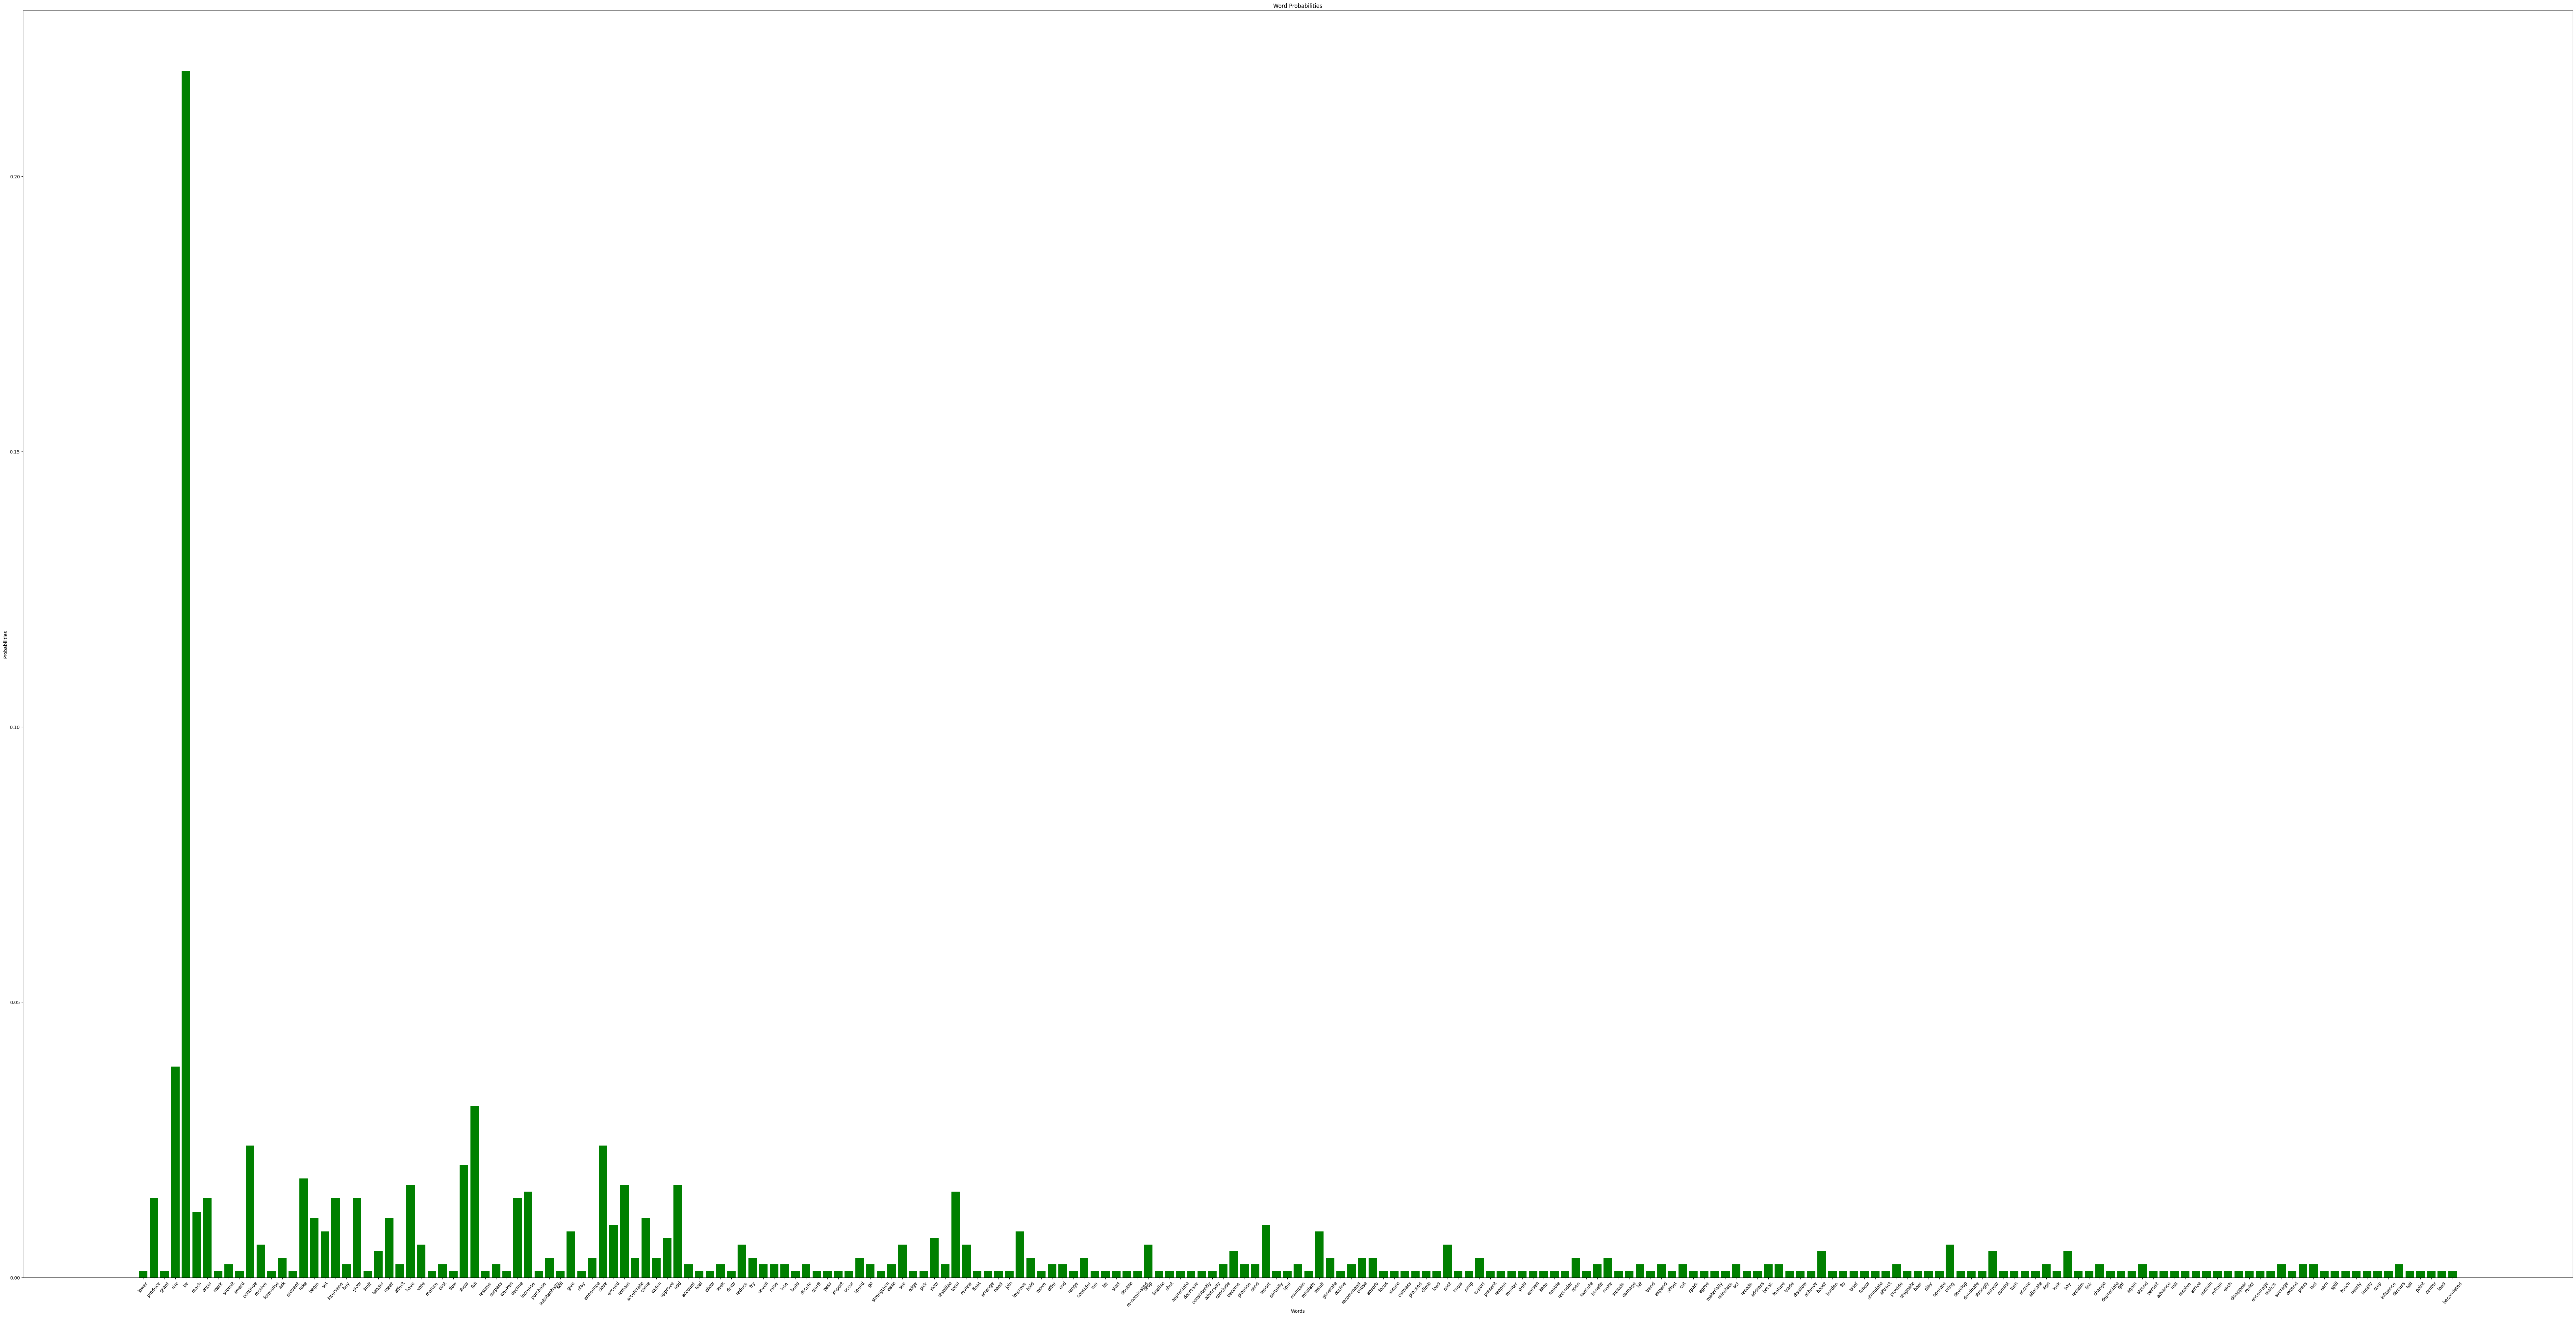

In [ ]:
def plot_word_probabilities(word_probabilities):
    """
    Plots a bar chart for the probabilities of each word in a given word_probabilities dictionary.
    Args:
        word_probabilities (dict): Dictionary containing words as keys and their probabilities as values.
    """
    words = list(word_probabilities.keys())
    probabilities = list(word_probabilities.values())

    plt.figure(figsize=(100, 50))
    plt.bar(words, probabilities, color='green')
    plt.xlabel('Words')
    plt.ylabel('Probabilities')
    plt.title('Word Probabilities')
    plt.xticks(rotation=50)
    plt.show()

# Example usage: plotting word probabilities for a specific n-gram
specific_ngram = ('expected', 'to')
word_probabilities = probabilistic_ngram_model[specific_ngram]
plot_word_probabilities(word_probabilities)



In [ ]:
"""
This code snippet prints the first 10 items (n-grams and their corresponding probabilities) from the probabilistic n-gram model.
probabilistic_ngram_model.items(): Retrieves a view object that displays a list of tuple pairs, where each tuple consists of an n-gram (key) and its associated probabilities (value).
[0:10]: Specifies that we want to slice the list of items from the beginning (index 0) up to, but not including, the item at index 10. This ensures that only the first 10 items are selected for printing.
Overall, this code provides a quick way to inspect a portion of the probabilistic n-gram model to understand its structure and contents.
"""
print(list(probabilistic_ngram_model.items())[0:10])


[(('asian', 'exporters'), {'fear': 1.0}), (('exporters', 'fear'), {'damage': 0.5, 'china': 0.5}), (('fear', 'damage'), {'from': 1.0}), (('damage', 'from'), {'u.s.-japan': 0.125, 'local': 0.125, 'the': 0.125, 'frigid': 0.125, 'repeated': 0.125, 'pod': 0.125, 'last': 0.125, 'spill': 0.125}), (('from', 'u.s.-japan'), {'rift': 1.0}), (('u.s.-japan', 'rift'), {'mounting': 1.0}), (('rift', 'mounting'), {'trade': 1.0}), (('mounting', 'trade'), {'friction': 0.6666666666666666, 'tension': 0.3333333333333333}), (('trade', 'friction'), {'between': 0.16666666666666666, 'with': 0.05555555555555555, 'diplomacy': 0.05555555555555555, 'the': 0.05555555555555555, 'and': 0.2777777777777778, 'unless': 0.05555555555555555, 'threatens': 0.05555555555555555, 'flared': 0.05555555555555555, 'could': 0.05555555555555555, 'will': 0.05555555555555555, 'is': 0.05555555555555555, 'japanese': 0.05555555555555555}), (('friction', 'between'), {'the': 1.0})]


In [ ]:
# Test the text generator
seed_text = "Inflation is"#This line initializes the seed_text variable with the starting text used to generate additional text.
generated_text = generate_text(probabilistic_ngram_model, seed_text, n_value, probability_threshold=0.00002, min_length=10)
#This line generates text using the generate_text function. It takes the following arguments:
#probabilistic_ngram_model: The probabilistic n-gram model used for text generation.
#seed_text: The initial text used to start generating additional text.
#n_value: The order of the n-gram model.
#probability_threshold: The threshold probability used to select the next word.
#min_length: The minimum length of the generated text.

#probability_threshold:
#This parameter determines the probability threshold for selecting the next word. For example, if you set its value to 0.00002, only words with probabilities higher than this threshold will be considered for selection.
#min_length:
#This parameter specifies the minimum number of words that the generated text must contain. Therefore, if you set min_length to 10, the generated text must consist of at least 10 words.
#In summary:
#probability_threshold determines which words are selected based on their probabilities, considering only those with probabilities higher than a specified threshold.
#min_length specifies the minimum number of words required for the generated text.

print(f"Generated Text: {generated_text}")
#This line prints the generated text.
#Overall, this code tests the text generation functionality by providing a seed text and generating additional text based on the probabilistic n-gram model.
#It then prints the generated text for examination.



Generated Text: inflation is rising as the yen and historically low levels


#Q2: Sentiment Analysis with Naive Bayes Classifier(50 Points)

**Objective:**

You are tasked with implementing a Naive Bayes classifier for sentiment analysis. The provided code is incomplete, and your goal is to complete the missing parts. Additionally, you should train the classifier on a small dataset and analyze its performance.

**Tasks:**

1.**Complete the Code (35 points)**: Fill in the missing parts in the provided Python code for the Naive Bayes classifier. Pay special attention to the `extract_features` function.

2.**Train and Test**: Train the Naive Bayes classifier on the training data and test it on a separate test set. Evaluate the accuracy of the classifier.

3.**Analysis (15 points)**: Discuss the results. Identify any misclassifications and try to understand why the classifier may fail in those cases. Provide examples of sentences that were not predicted correctly and explain possible reasons.


In [ ]:
import random  # Importing the random module for generating random numbers
import math  # Importing the math module for advanced mathematical operations
import string  # Importing the string module for working with strings
from collections import defaultdict , Counter # Importing the defaultdict class from the collections module for creating a dictionary with default values
from nltk.corpus import stopwords  # Importing the stopwords set from nltk.corpus for handling common words
from nltk.stem import PorterStemmer  # Importing the PorterStemmer class for stemming words from nltk.stem
from nltk.corpus import movie_reviews  # Importing the movie reviews corpus from nltk.corpus
import nltk  # Importing the nltk module for natural language processing
from tqdm import tqdm  # Importing the tqdm class from the tqdm module for displaying progress bars
# Downloading NLTK resources
nltk.download('movie_reviews')  # Downloading the movie reviews dataset from NLTK
nltk.download('punkt')  # Downloading tokenizers from NLTK
nltk.download('stopwords')  # Downloading the stopwords dataset from NLTK


[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
def get_features(tokens):
    # Remove punctuation, stopwords, and perform stemming
    # This function takes a list of tokens as input and processes them to extract relevant features.

    # Remove punctuation
    tokens = [word for word in tokens if word not in string.punctuation]

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.lower() not in stop_words]

    # Perform stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]

    return tokens


In [ ]:
class NaiveBayesClassifier:
    def __init__(self, classes):
        # Initialize the Naive Bayes classifier with given classes
        self.classes = classes
        # Initialize dictionaries to store class probabilities and feature probabilities
        self.class_probs = defaultdict(float)
        self.feature_probs = defaultdict(lambda: defaultdict(float))

    def train(self, training_data, smoothing=1):
        # Train the Naive Bayes classifier using the given training data and optional smoothing parameter

        # Calculate class probabilities and feature probabilities
        for features, label in training_data:
            # Increment class count for each document
            self.class_probs[label] += 1
            # Update feature counts for each class
            for feature in get_features(features):
                self.feature_probs[feature][label] += 1

        # Normalize class probabilities
        total_docs = sum(self.class_probs.values())
        for label in self.classes:
            self.class_probs[label] /= total_docs

        # Normalize feature probabilities and apply Laplace smoothing
        for feature in self.feature_probs:
            total_feature_count = sum(self.feature_probs[feature].values())
            for label in self.classes:
                self.feature_probs[feature][label] += smoothing
                self.feature_probs[feature][label] /= (total_feature_count + len(self.classes) * smoothing)

    def classify(self, features):
        # Classify the given features using the trained Naive Bayes classifier

        # Calculate class scores for the given features
        class_scores = defaultdict(float)
        for label in self.classes:
            class_scores[label] = math.log(self.class_probs[label])
            # Update class scores with feature probabilities
            for feature in get_features(features):
                if feature in self.feature_probs:
                    class_scores[label] += math.log(self.feature_probs[feature][label])

        # Return the class with the highest score
        return max(class_scores, key=class_scores.get)

        """
        This class NaiveBayesClassifier implements a simple Naive Bayes classifier. It supports training using labeled training data and classifying new instances based on learned probabilities.
        __init__: Initializes the classifier with given classes and dictionaries to store class and feature probabilities.
        train: Trains the classifier using the given training data. It calculates class probabilities and feature probabilities, normalizes them, and applies Laplace smoothing.
        classify: Classifies new instances using the trained classifier. It calculates class scores for the input features based on the learned probabilities and returns the class with the highest score.
        This classifier assumes that features are preprocessed using the get_features function, which removes punctuation, stopwords, and performs stemming.

        """


Train Accuracy: 0.963125


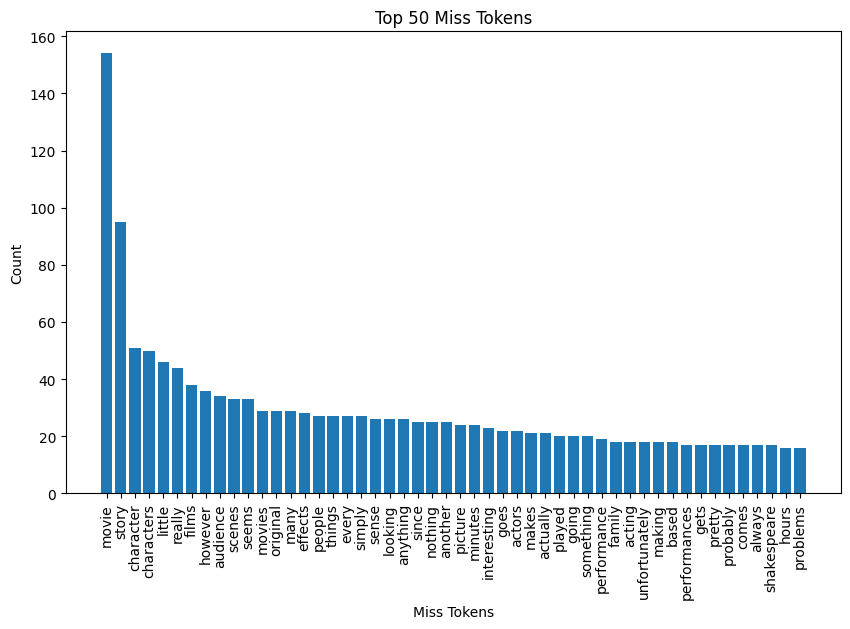

Test Accuracy: 0.795


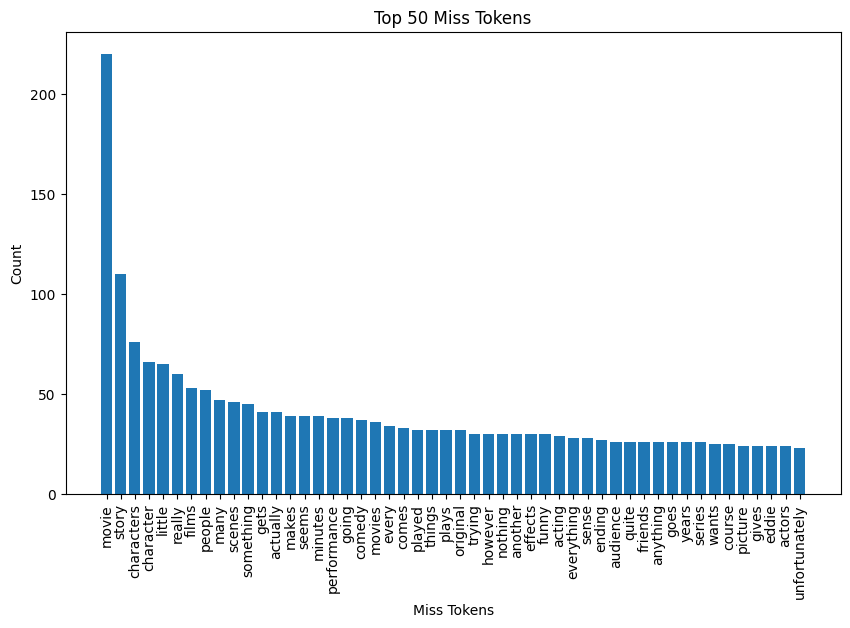

In [67]:
"""
This script loads the movie reviews dataset from NLTK, shuffles it, splits it into training and testing sets, trains a Naive Bayes classifier using the training set, and then evaluates the classifier's accuracy on both the training and testing sets.
The dataset is loaded from NLTK's movie reviews corpus and stored as a list of tuples where each tuple contains the words of a movie review file and its corresponding category (positive or negative sentiment).
The dataset is shuffled twice to ensure randomness.
The shuffled dataset is split into training and testing sets using an 80-20 split ratio.
The Naive Bayes classifier is trained on the training set.
The accuracy of the classifier is calculated and printed for both the training and testing sets.

"""


# Load the movie reviews dataset from NLTK
random.seed(256)
# Create a list of tuples where each tuple contains the words of a movie review file and its corresponding category
data = [(list(movie_reviews.words(fileid)), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]

random.shuffle(data)  # Shuffle the dataset for randomness

random.shuffle(data)  # Shuffle the dataset again for additional randomness

"""
The random.seed(256) function is used to set a fixed starting point for generating random numbers. When you specify a seed, the random numbers generated will be reproducible, meaning that each time the program is run, a similar sequence of random numbers will be produced. This helps make the results predictable and repeatable across runs.
Additionally, random.shuffle(data) is performed twice to ensure that the data is completely shuffled randomly. This step is important because if the data is ordered (based on the existing categories), the training algorithm might access information from similar time frames during training, potentially leading to unreliable results. By shuffling the data, we ensure that each time the training algorithm encounters a different set of data, which helps the algorithm perform better on unseen test data.
In summary, using random.seed(256) and random.shuffle(data) creates a reproducible random environment and ensures that the data is shuffled randomly, which can improve the performance and accuracy of the model.
"""


# Split the dataset into training and testing sets
split_ratio = 0.8
split_index = int(len(data) * split_ratio)
train_set = data[:split_index]  # Training set contains the first 80% of data
test_set = data[split_index:]   # Testing set contains the remaining 20% of data

# Train the Naive Bayes classifier
classes = set(sentiment for _, sentiment in train_set)  # Extract unique classes from the training set
classifier = NaiveBayesClassifier(classes)  # Initialize the Naive Bayes classifier
classifier.train(train_set)  # Train the classifier using the training set

def calculate_accuracy(dataset, dataset_type):
    # Test the classifier on the testing set
    correct_predictions = 0
    miss_tokens = []  # List to store miss tokens

    for example in dataset:
        tokens, true_sentiment = example
        features = get_features(tokens)  # Extract features from the tokens
        predicted_sentiment = classifier.classify(features)  # Classify the features
        if predicted_sentiment == true_sentiment:  # Check if the predicted sentiment matches the true sentiment
            correct_predictions += 1
        else:
            # Remove punctuation
            tokens = [word for word in tokens if word not in string.punctuation]

            # Remove stopwords
            stop_words = set(stopwords.words('english'))
            tokens = [word for word in tokens if word.lower() not in stop_words]
            miss_tokens.extend([token for token in tokens if token not in features])  # Add miss tokens to the list

    accuracy = correct_predictions / len(dataset)  # Calculate accuracy
    print(f"{dataset_type} Accuracy: {accuracy}")  # Print the accuracy

    # Count miss tokens and select the top 50
    miss_token_counts = Counter(miss_tokens)
    top_miss_tokens = miss_token_counts.most_common(50)

    # Extract token and count for plotting
    tokens = [token for token, count in top_miss_tokens]
    counts = [count for token, count in top_miss_tokens]

    # Plot the bar chart
    plt.figure(figsize=(10, 6))
    plt.bar(tokens, counts)
    plt.xlabel('Miss Tokens')
    plt.ylabel('Count')
    plt.title('Top 50 Miss Tokens')
    plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
    plt.show()

calculate_accuracy(train_set, 'Train')  # Calculate and print accuracy on the training set
calculate_accuracy(test_set, 'Test')    # Calculate and print accuracy on the testing set


#Submission Instructions:


1.Submit a Google Colab notebook containing your completed code and experimentation results.

2.Include comments and explanations in your code to help understand the implemented logic.

3.Clearly present the results of your parameter tuning in the notebook.

4.Provide a brief summary of your findings and insights in the conclusion section.

**Additional Notes:**
*   Ensure that the notebook runs successfully in Google Colab.
*   Experiment with various seed texts to showcase the diversity of generated text.
*   Document any issues encountered during experimentation and how you addressed them.

**Grading:**
*   Each task will be graded out of the specified points.
*   Points will be awarded for correctness, clarity of code, thorough experimentation, and insightful analysis.